# KNN Regression

In [1]:
library('caret')

Loading required package: lattice

Loading required package: ggplot2



# simulation

In [2]:
?runif

Uniform {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
"min, max",lower and upper limits of the distribution. Must be finite.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x]."


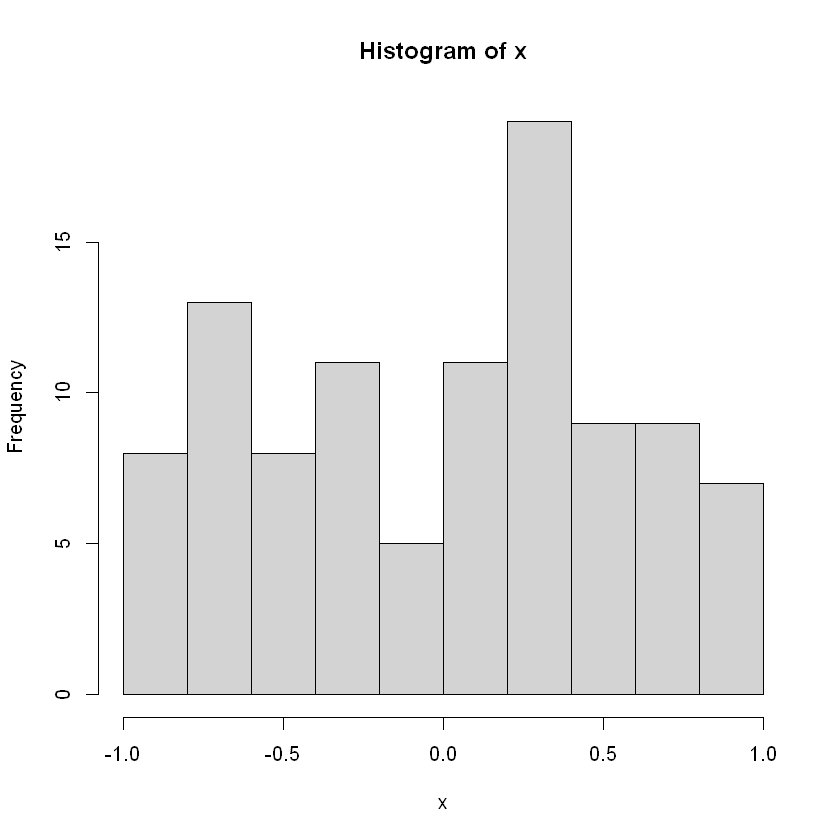

In [3]:
x = runif(100,-1,1)
x_ord = order(x)
hist(x)

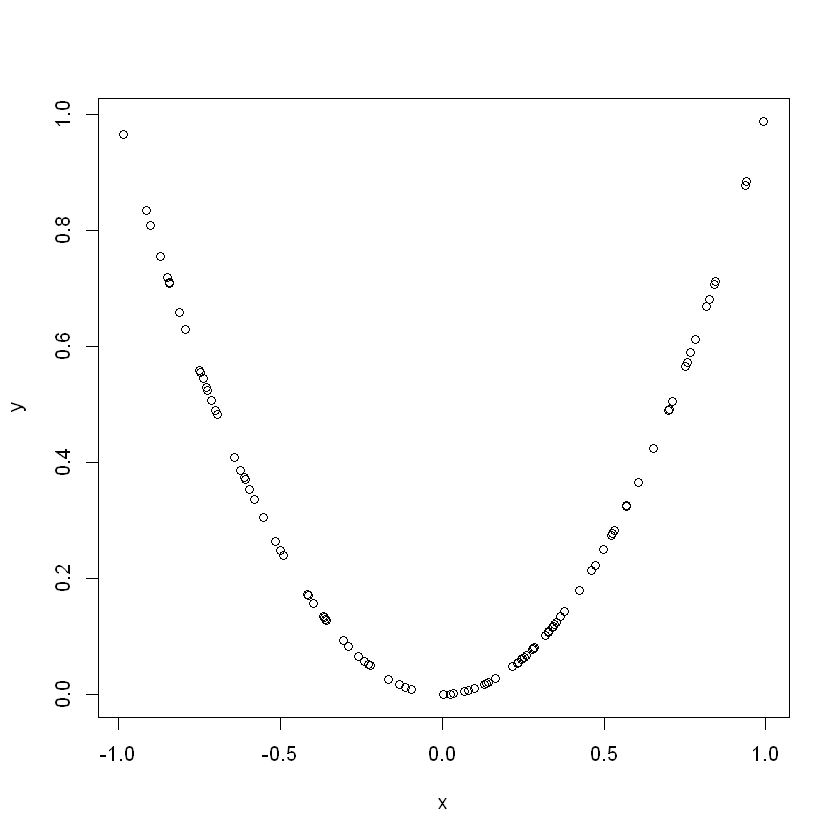

In [4]:
y = x^2 # f(x) = x^2
plot(x,y)

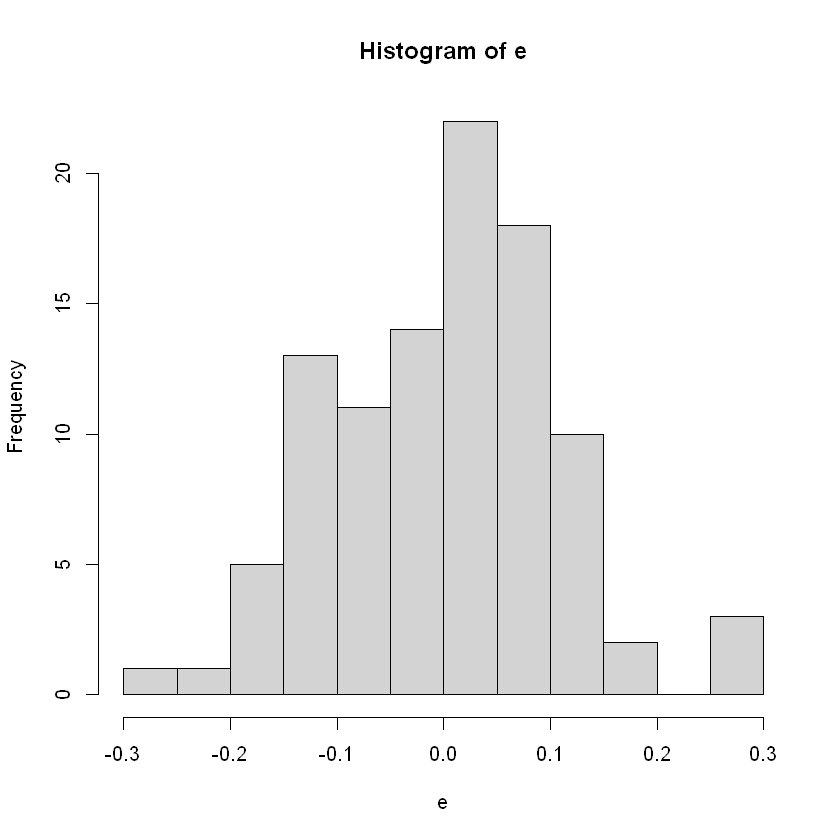

In [5]:
e = rnorm(100,0,1/10)
hist(e)

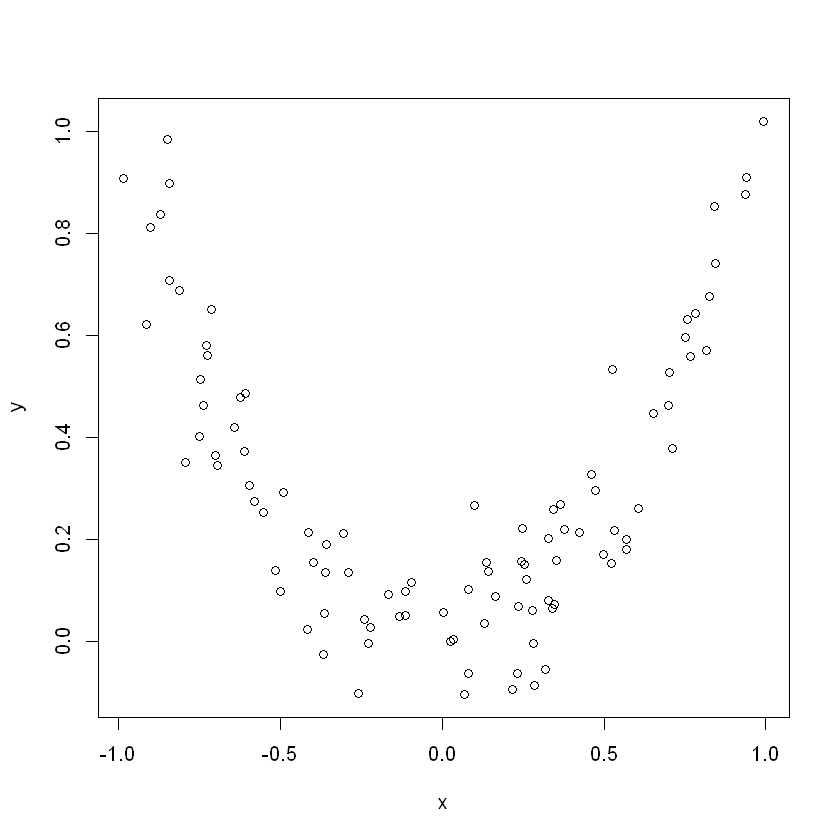

In [6]:
y = x^2 + e
plot(x,y)

# using linear regression

In [7]:
mod = lm(y~x) # y = b0 + b1*x
summary(mod)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4108 -0.2137 -0.0756  0.1823  0.7424 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.30248    0.02849  10.616   <2e-16 ***
x           -0.02551    0.05194  -0.491    0.624    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2849 on 98 degrees of freedom
Multiple R-squared:  0.002454,	Adjusted R-squared:  -0.007725 
F-statistic: 0.2411 on 1 and 98 DF,  p-value: 0.6245


[1] 100   2

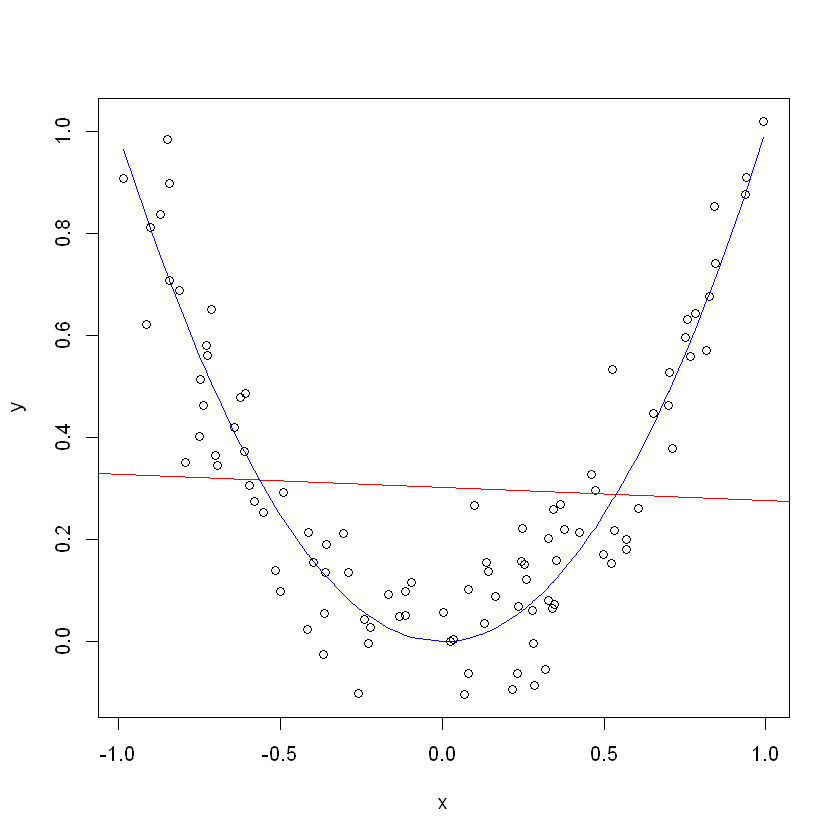

In [8]:
plot(x,y)
abline(coef(mod),col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')
dim(model.matrix(mod))

# KNN

In [9]:
?knnreg

knnreg {caret},R Documentation
x,a matrix or data frame of training set predictors.
...,additional parameters to pass to knnregTrain.
formula,a formula of the form lhs ~ rhs where lhs is the response variable and rhs a set of predictors.
data,optional data frame containing the variables in the model formula.
subset,optional vector specifying a subset of observations to be used.
na.action,function which indicates what should happen when the data contain NAs.
k,number of neighbours considered.
y,a numeric vector of outcomes.
train,matrix or data frame of training set cases.
test,matrix or data frame of test set cases. A vector will be interpreted as a row vector for a single case.


In [10]:
df = data.frame(x=x,y=y)
knn_mod = knnreg(y~.,data=df,k=10)

In [20]:
xe = data.frame(x=sort(runif(1000,-1.5,1.5)))

In [21]:
head(sample(predict(knn_mod,xe)))

[1] 0.07639810 0.42485052 0.05997201 0.72070499 0.74791596 0.04353417

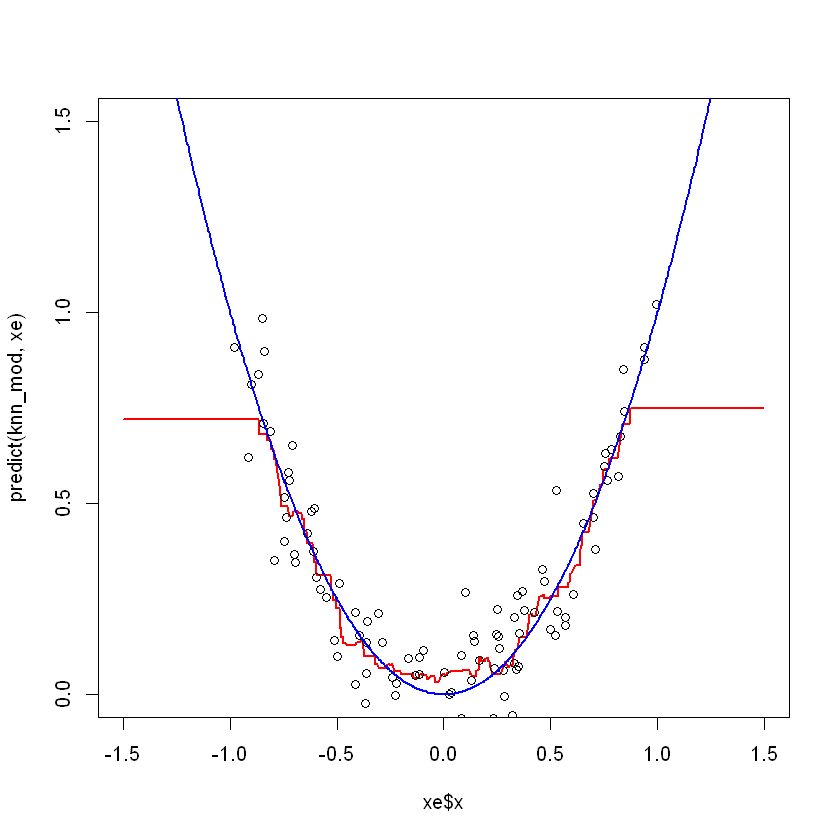

In [26]:
plot(xe$x,predict(knn_mod,xe),col='red',lwd=2,type='l',ylim=c(0,1.5))
points(x,y)
lines(xe$x,xe$x^2,col='blue',lwd=2)

## k = 3

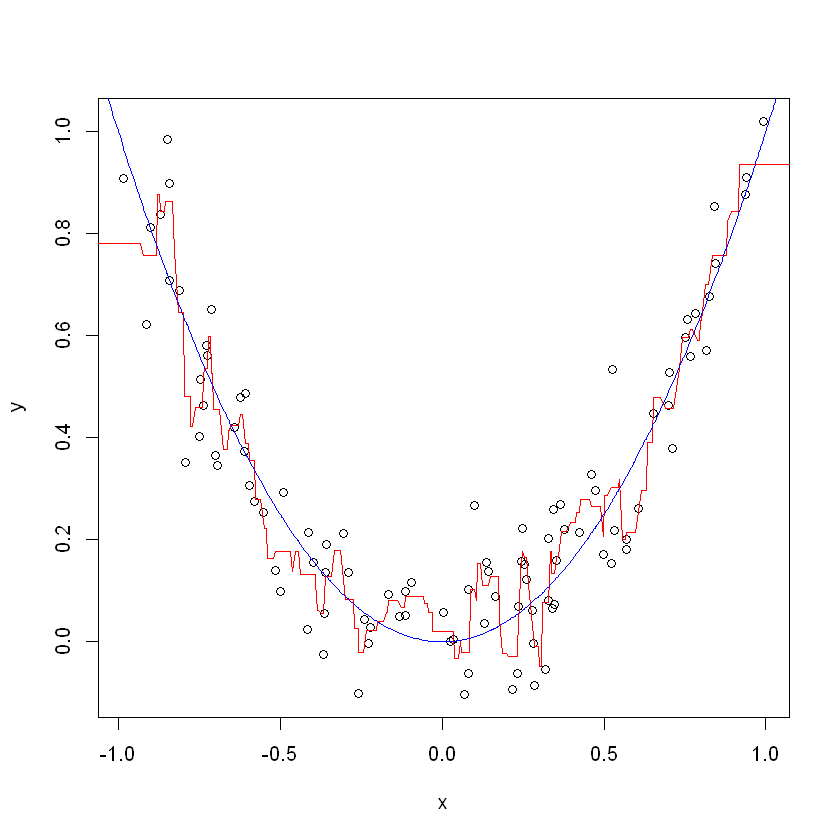

In [27]:
knn_mod = knnreg(y~.,data=df,k=3)
plot(x,y)
lines(xe$x,predict(knn_mod,xe),col='red')
lines(xe$x,xe$x^2,col='blue')

# k = 1

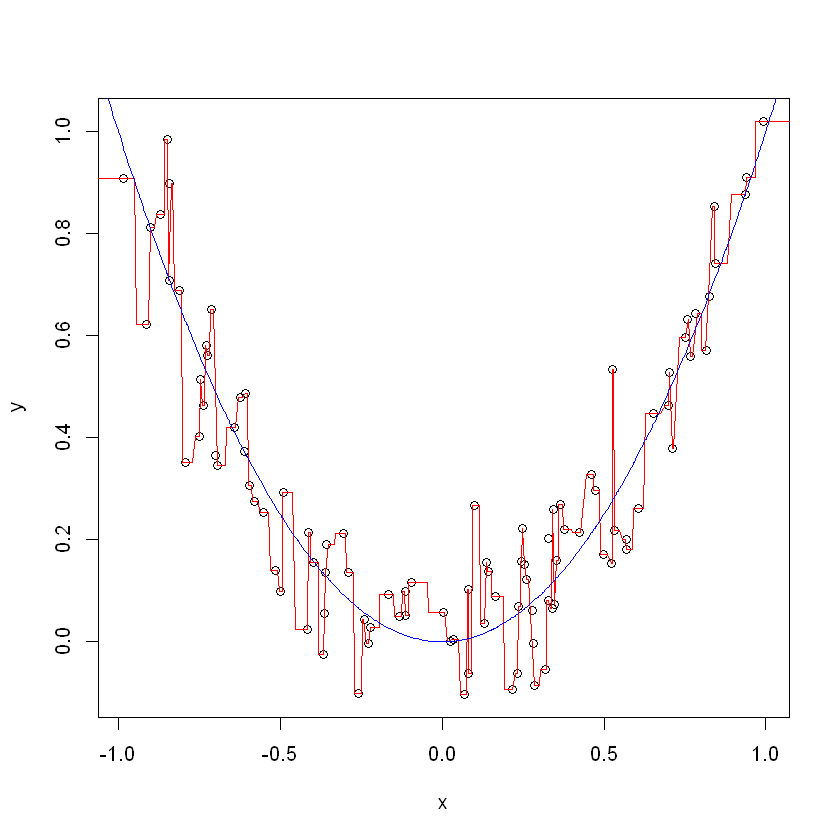

In [28]:
knn_mod = knnreg(y~.,data=df,k=1)
plot(x,y)
lines(xe$x,predict(knn_mod,xe),col='red')
lines(xe$x,xe$x^2,col='blue')

# k = 50

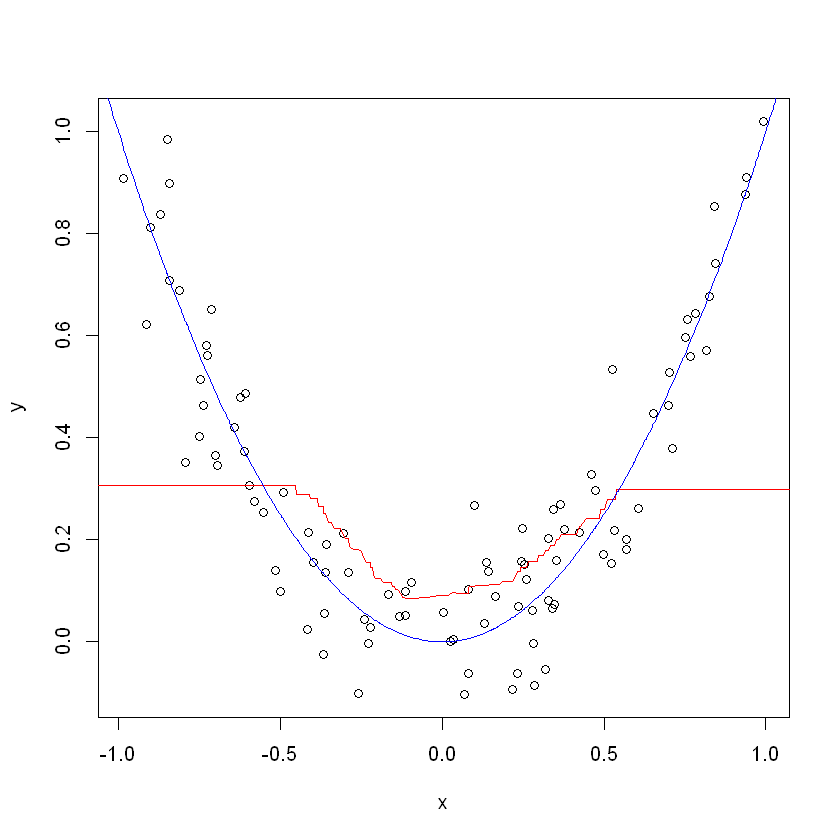

In [29]:
knn_mod = knnreg(y~.,data=df,k=50)
plot(x,y)
lines(xe$x,predict(knn_mod,xe),col='red')
lines(xe$x,xe$x^2,col='blue')

# k = 100

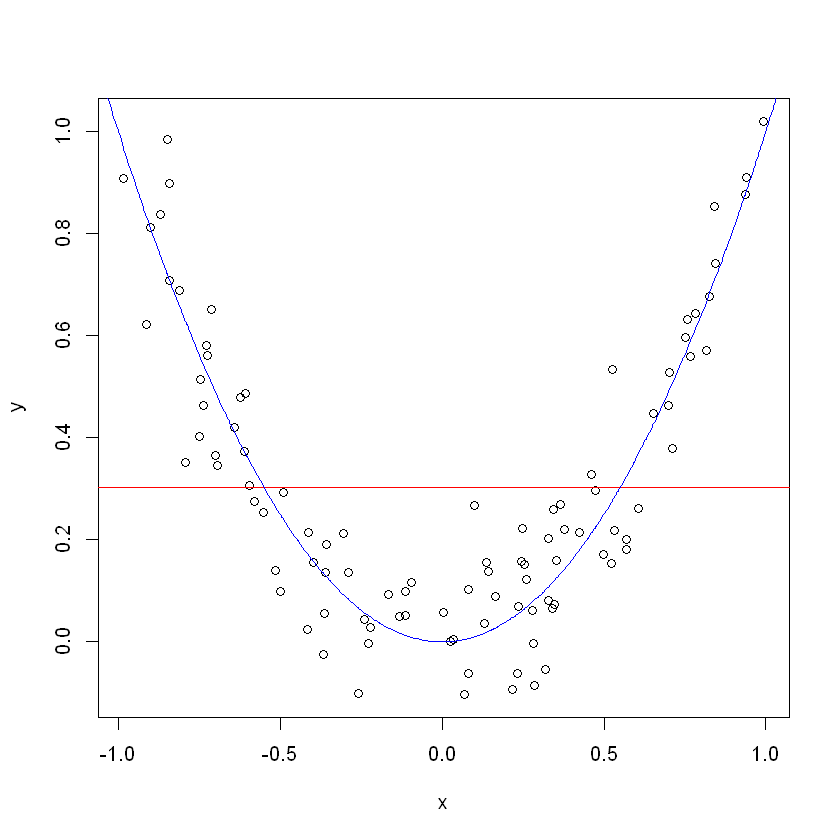

In [30]:
knn_mod = knnreg(y~.,data=df,k=100)
plot(x,y)
lines(xe$x,predict(knn_mod,xe),col='red')
lines(xe$x,xe$x^2,col='blue')
#abline(h=mean(y),lty=2,col='orange')

In [31]:
mean(y)

[1] 0.3025561

In [32]:
head(predict(knn_mod))

[1] 0.3025561 0.3025561 0.3025561 0.3025561 0.3025561 0.3025561

# Can do we do this with a linear model?

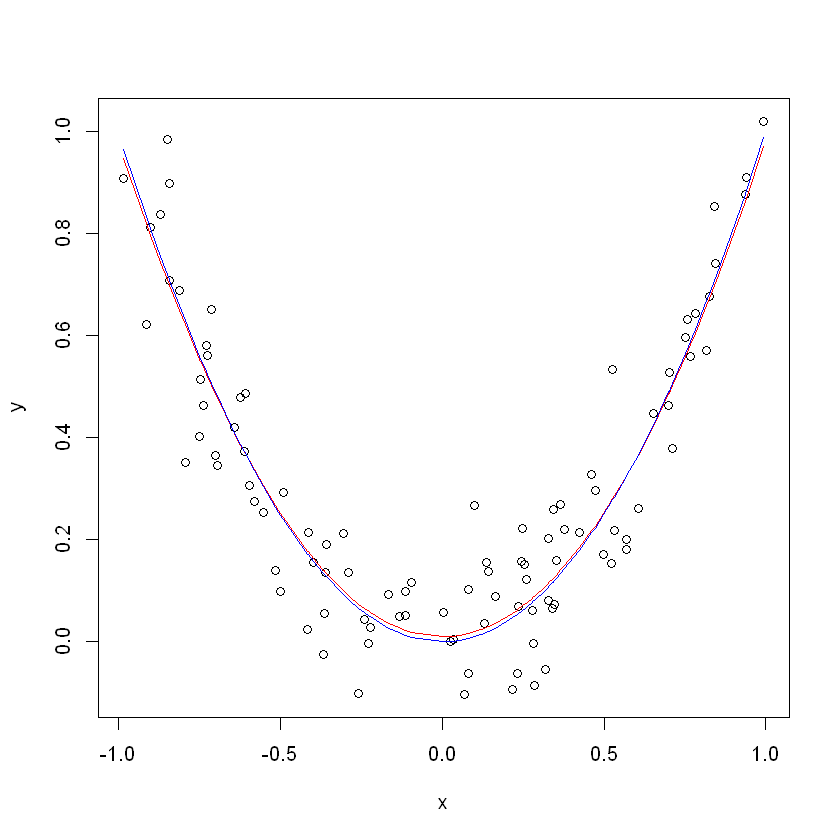

In [33]:
lin_mod = lm(y~I(x^2)) # y = b0+b1x^2
plot(x,y)
lines(x[x_ord],predict(lin_mod)[x_ord],col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')

[1] 100   3

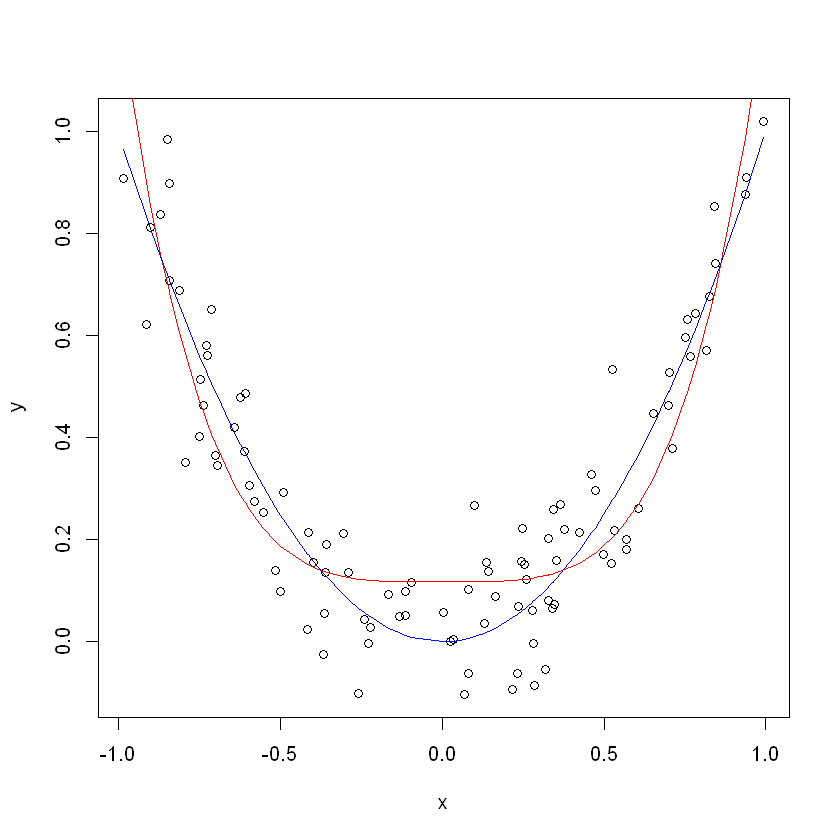

In [34]:
lin_mod = lm(y~x+I(x^4)) # y = b0+b1x^2
plot(x,y)
lines(x[x_ord],predict(lin_mod)[x_ord],col='red')
lines(x[x_ord],x[x_ord]^2,col='blue')
dim(model.matrix(lin_mod))